In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("region_hospital_icu_covid_data.csv")
data.head()

,date,oh_region,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,2020-04-01,CENTRAL,46,34,115,0,0,0,0
1,2020-04-02,CENTRAL,51,46,129,0,0,0,0
2,2020-04-03,CENTRAL,58,52,148,0,0,0,0
3,2020-04-04,CENTRAL,57,49,161,0,0,0,0
4,2020-04-05,CENTRAL,62,49,154,0,0,0,0


* Do some basic data exploration using pandas and include at minimum **one visualization** and the calculation of **two summary statistics**.

In [3]:
print(data.columns)
for name in data.columns[2:]:
    print(data[name].describe())

Index(['date', 'oh_region', 'icu_current_covid', 'icu_current_covid_vented',
       'hospitalizations', 'icu_crci_total', 'icu_crci_total_vented',
       'icu_former_covid', 'icu_former_covid_vented'],
      dtype='object')
count     10200
unique      238
top           0
freq       1031
Name: icu_current_covid, dtype: object
count     10200
unique      183
top           0
freq       2077
Name: icu_current_covid_vented, dtype: object
count    10200.000000
mean       136.946373
std        153.915371
min          0.000000
25%         26.000000
50%         83.000000
75%        204.000000
max       1239.000000
Name: hospitalizations, dtype: float64
count     10200
unique      252
top           0
freq       1120
Name: icu_crci_total, dtype: object
count     10200
unique      195
top           0
freq       2007
Name: icu_crci_total_vented, dtype: object
count     10200
unique       36
top           0
freq       3185
Name: icu_former_covid, dtype: object
count     10200
unique       27
top    

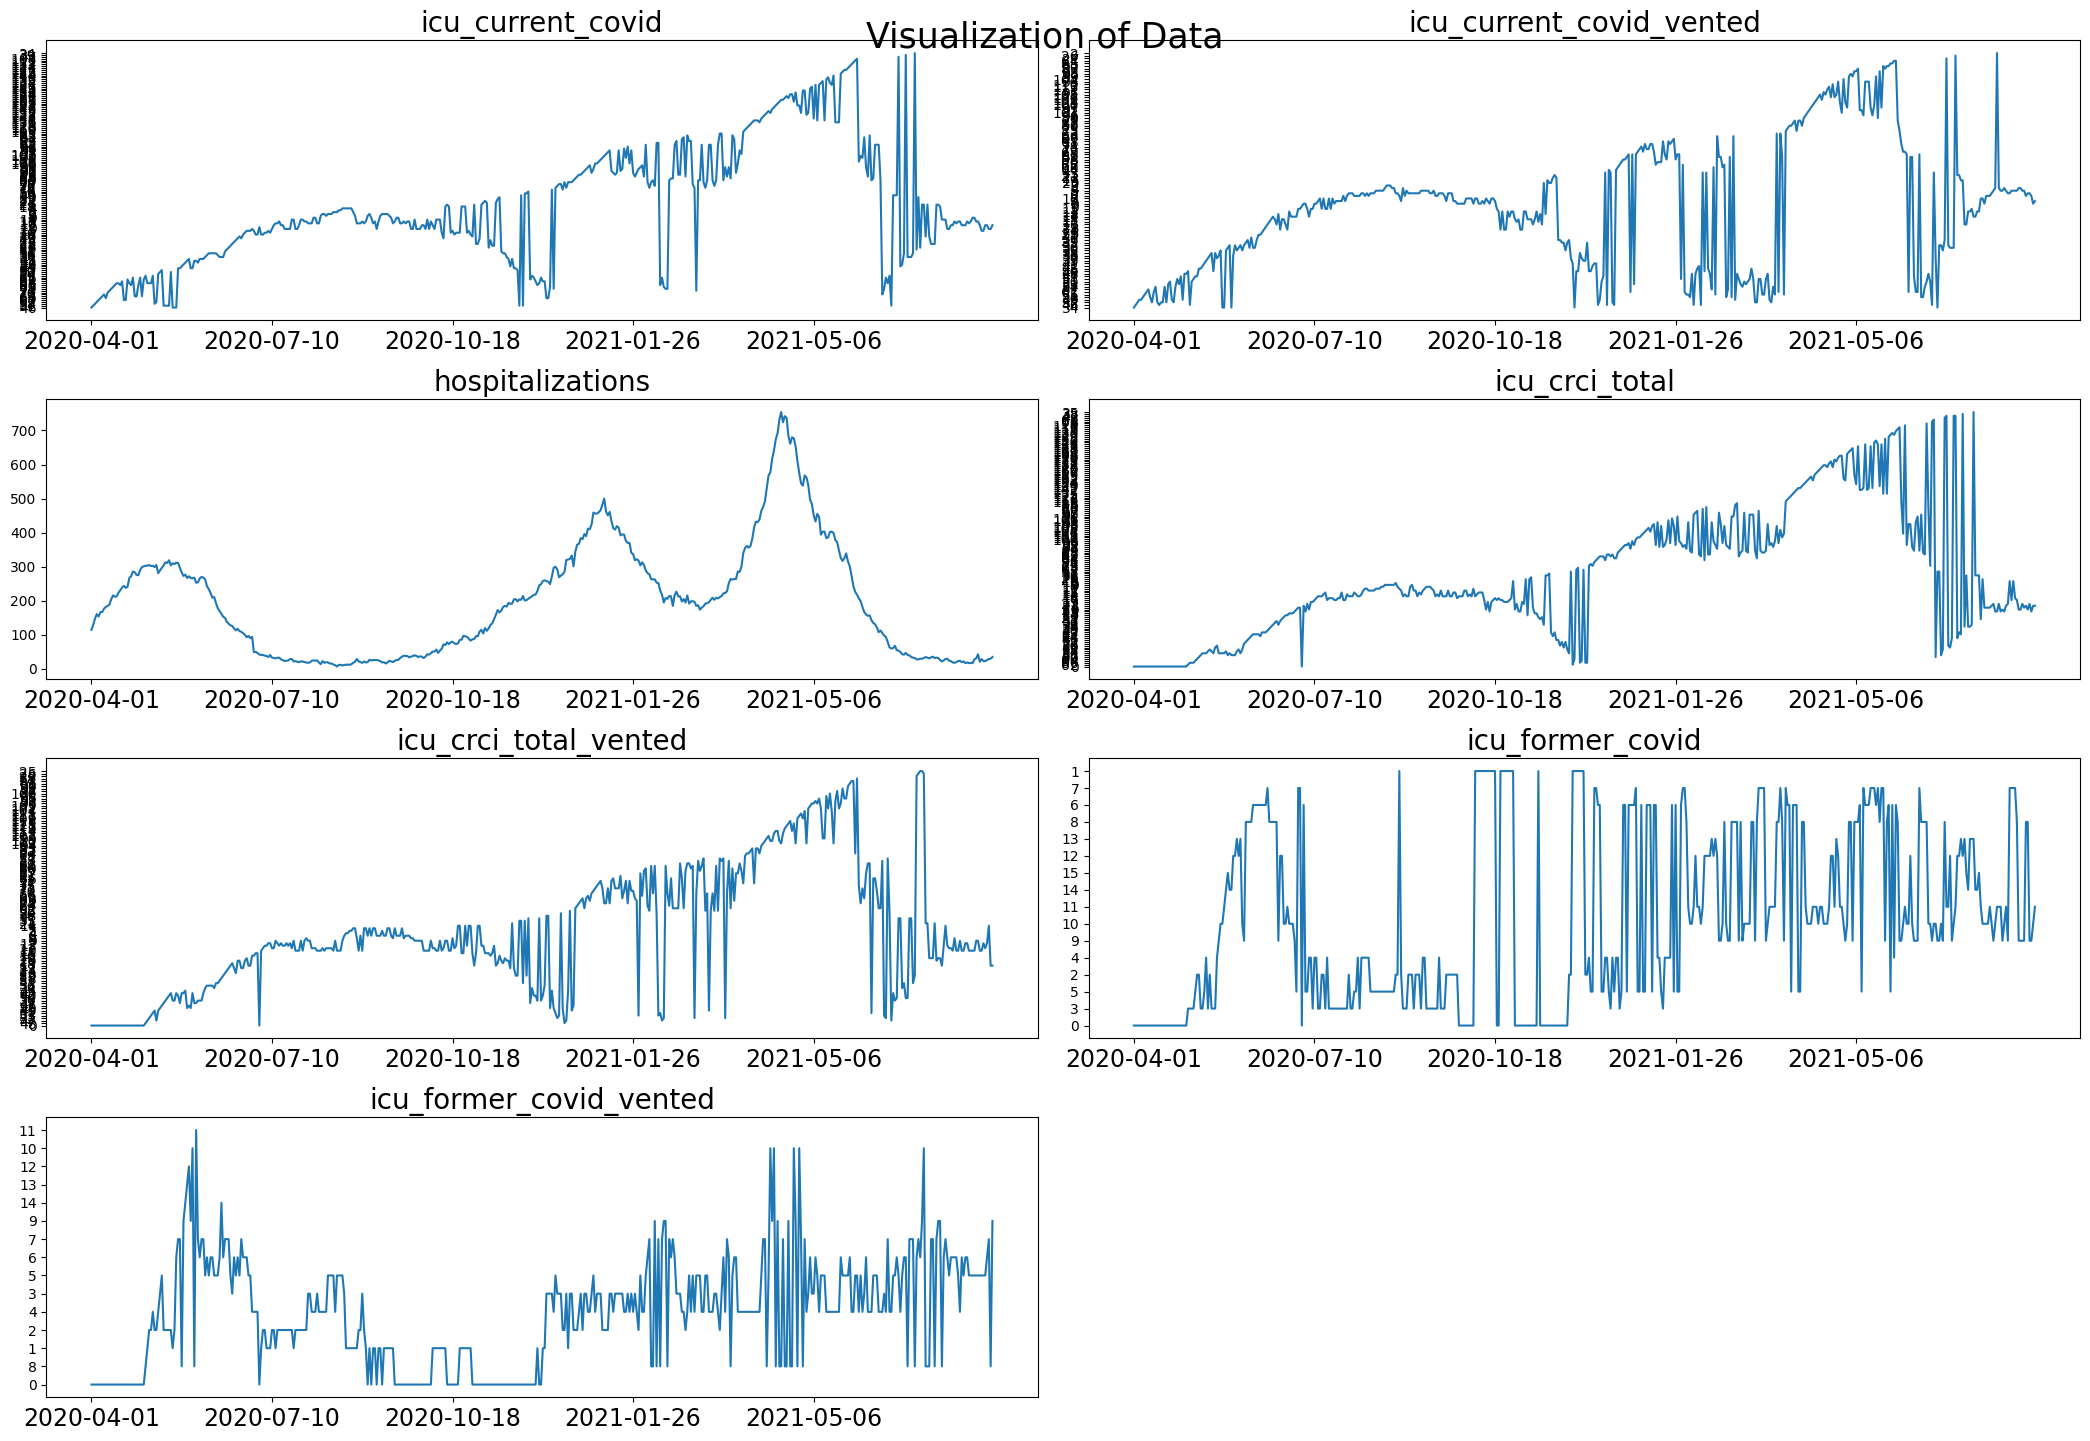

In [4]:

plt.figure(figsize=(21,15))
i = 1
plt.suptitle("Visualization of Data", fontsize = 25, y = 0.95)
for name in data.columns[2:]:
    plt.subplot(4,2,i)
    plt.plot(np.arange(len(data['date'][:500])), data[name][:500])
    plt.xticks(np.arange(0,500,100), data["date"][0:500:100], fontsize = 17)
    plt.title(name, fontsize = 20)
    i +=1
plt.tight_layout()
plt.show()

In [5]:
regions = data["oh_region"].unique() #Each region has equal number of data points (entries)
regions

array(['CENTRAL', 'EAST', 'NORTH EAST', 'NORTH WEST', 'TORONTO', 'WEST'],
      dtype=object)

In [6]:
data.set_index("oh_region", inplace= True)

data.head()

,date,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
oh_region,,,,,,,,
CENTRAL,2020-04-01,46,34,115,0,0,0,0
CENTRAL,2020-04-02,51,46,129,0,0,0,0
CENTRAL,2020-04-03,58,52,148,0,0,0,0
CENTRAL,2020-04-04,57,49,161,0,0,0,0
CENTRAL,2020-04-05,62,49,154,0,0,0,0


In [10]:
# data.loc['CENTRAL', "icu_current_covid"]
for region in regions:
    location = data.loc[region]
    # location = pd.DataFrame(location["count"])
    print(location['date'][:3])
    print(location.columns)

oh_region
CENTRAL    2020-04-01
CENTRAL    2020-04-02
CENTRAL    2020-04-03
Name: date, dtype: object
Index(['date', 'icu_current_covid', 'icu_current_covid_vented',
       'hospitalizations', 'icu_crci_total', 'icu_crci_total_vented',
       'icu_former_covid', 'icu_former_covid_vented'],
      dtype='object')
oh_region
EAST    2020-04-01
EAST    2020-04-02
EAST    2020-04-03
Name: date, dtype: object
Index(['date', 'icu_current_covid', 'icu_current_covid_vented',
       'hospitalizations', 'icu_crci_total', 'icu_crci_total_vented',
       'icu_former_covid', 'icu_former_covid_vented'],
      dtype='object')
oh_region
NORTH EAST    2020-04-01
NORTH EAST    2020-04-02
NORTH EAST    2020-04-03
Name: date, dtype: object
Index(['date', 'icu_current_covid', 'icu_current_covid_vented',
       'hospitalizations', 'icu_crci_total', 'icu_crci_total_vented',
       'icu_former_covid', 'icu_former_covid_vented'],
      dtype='object')
oh_region
NORTH WEST    2020-04-01
NORTH WEST    2020-04-02
N

In [22]:

region_group = data.groupby([data["oh_region"]]).value_counts()
region_group = pd.DataFrame(region_group)
region_group.head()
region_group.tail()
# for region in regions:
#     location = region_group.loc[region]
#     location = pd.DataFrame(location["count"])
#     print(location.head())
#     print(location.columns)

region_group.columns


Index(['count'], dtype='object')

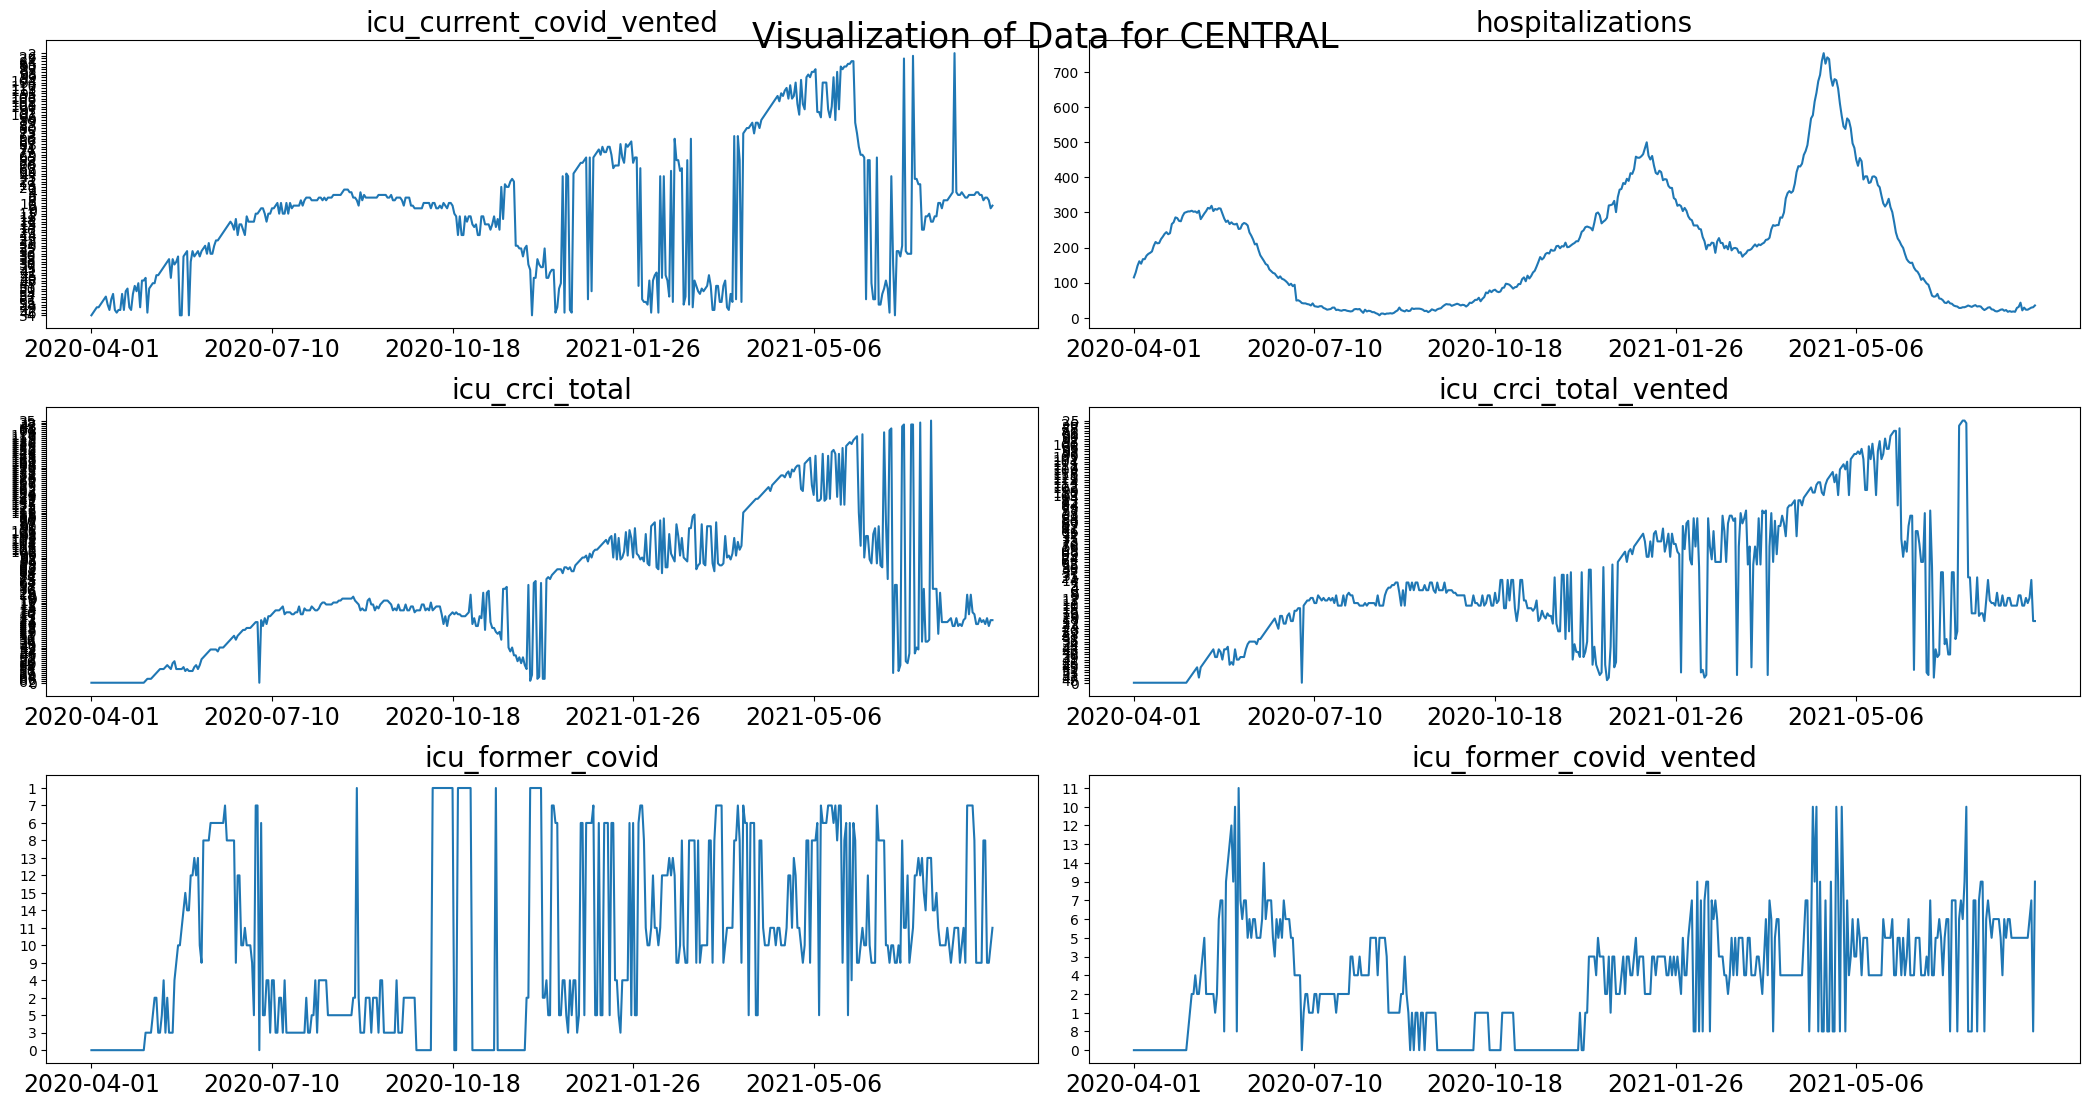

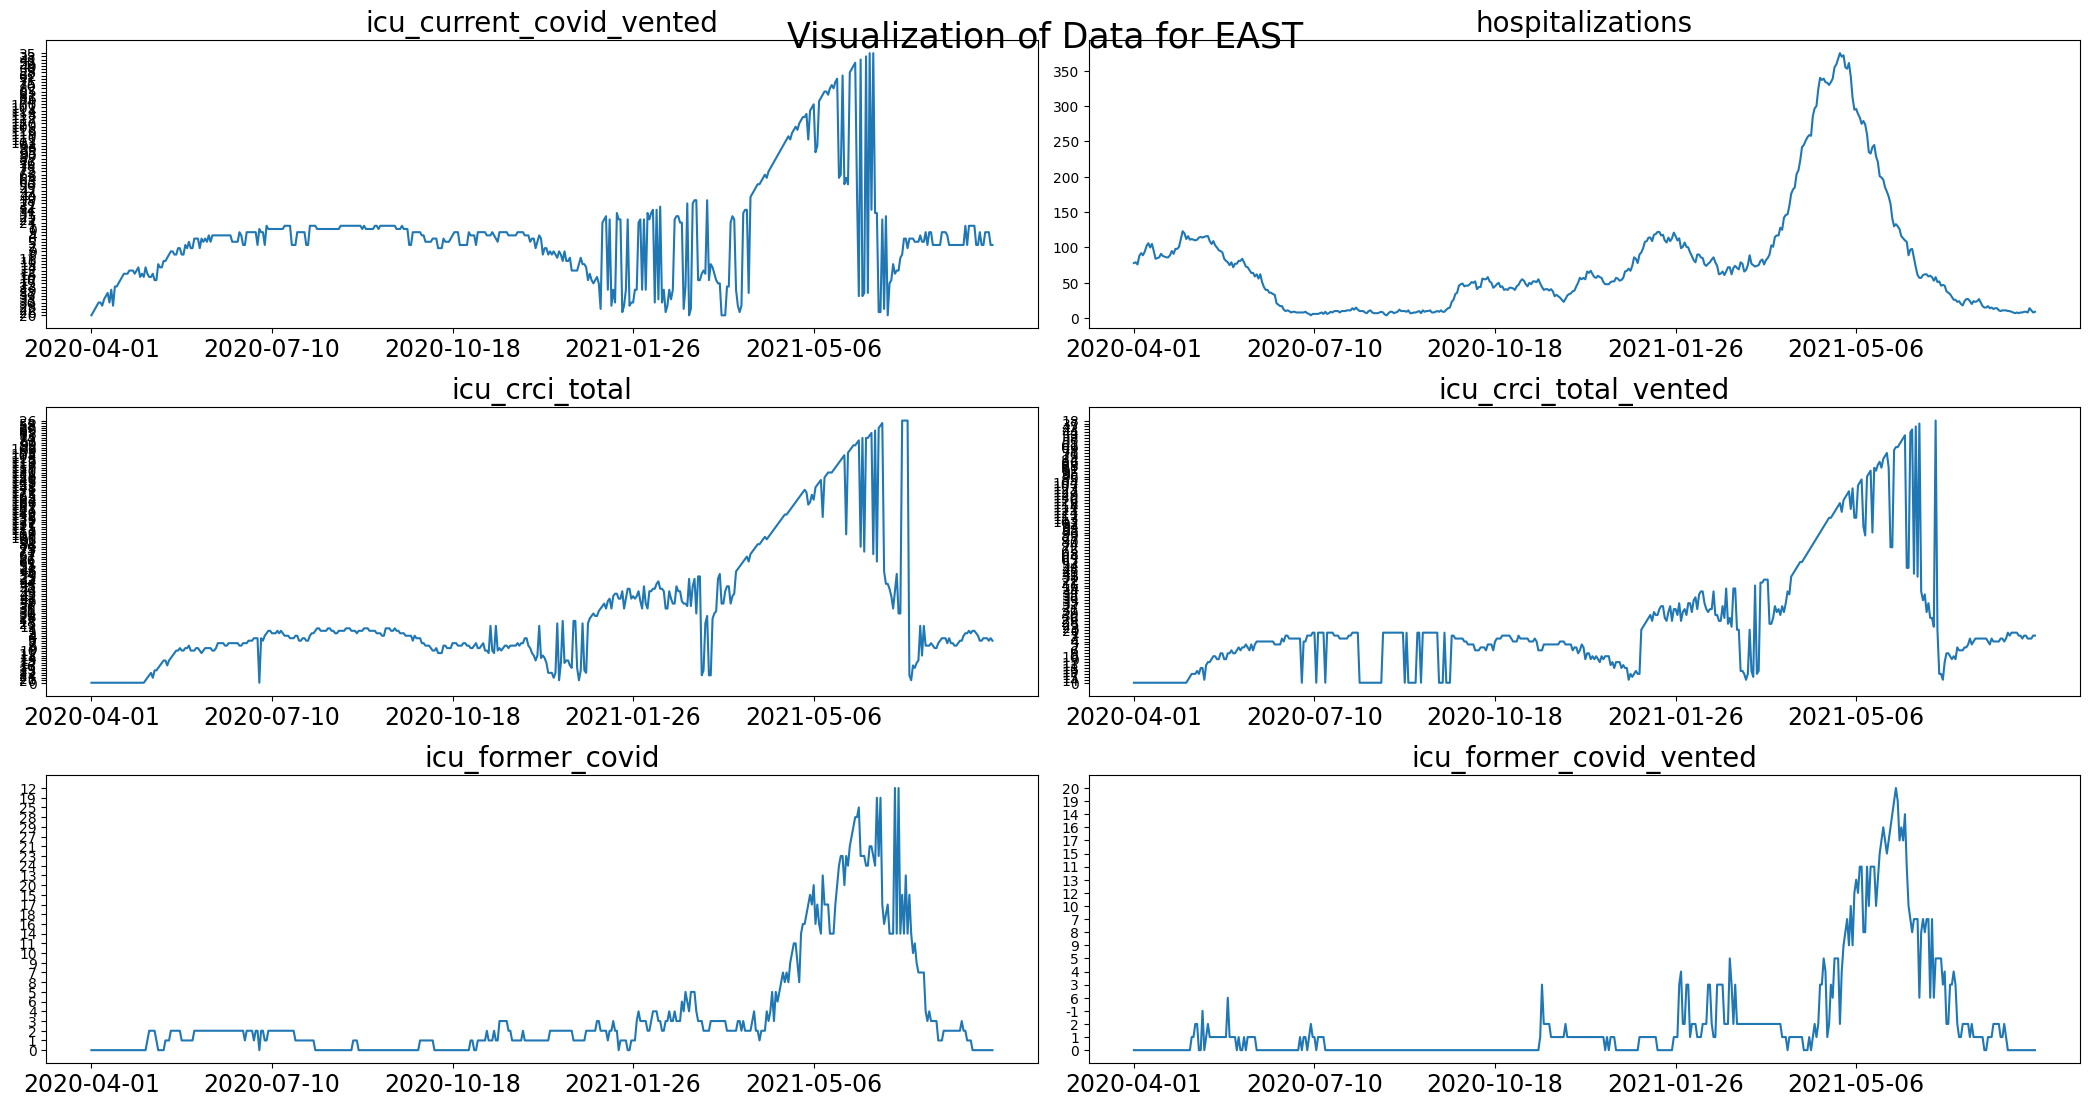

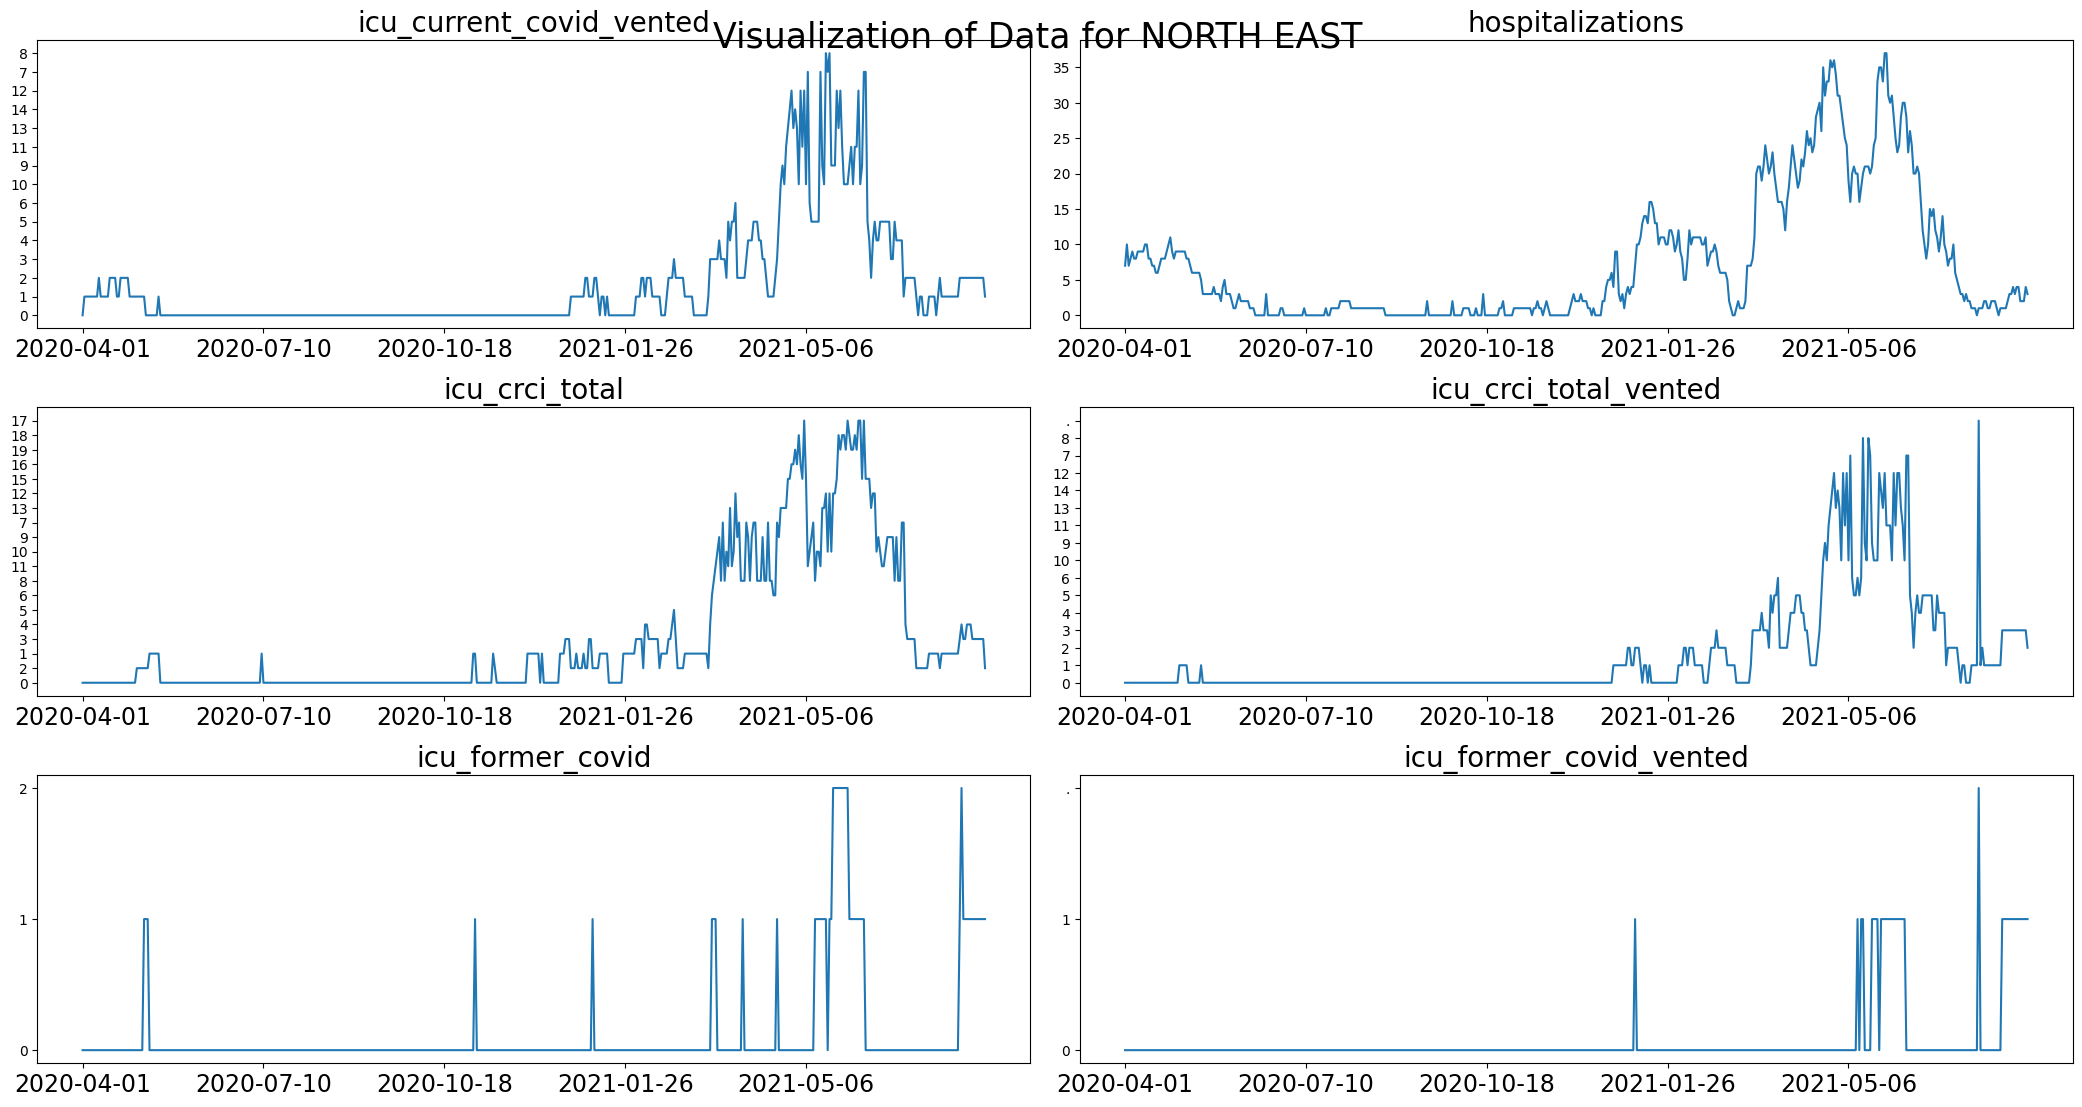

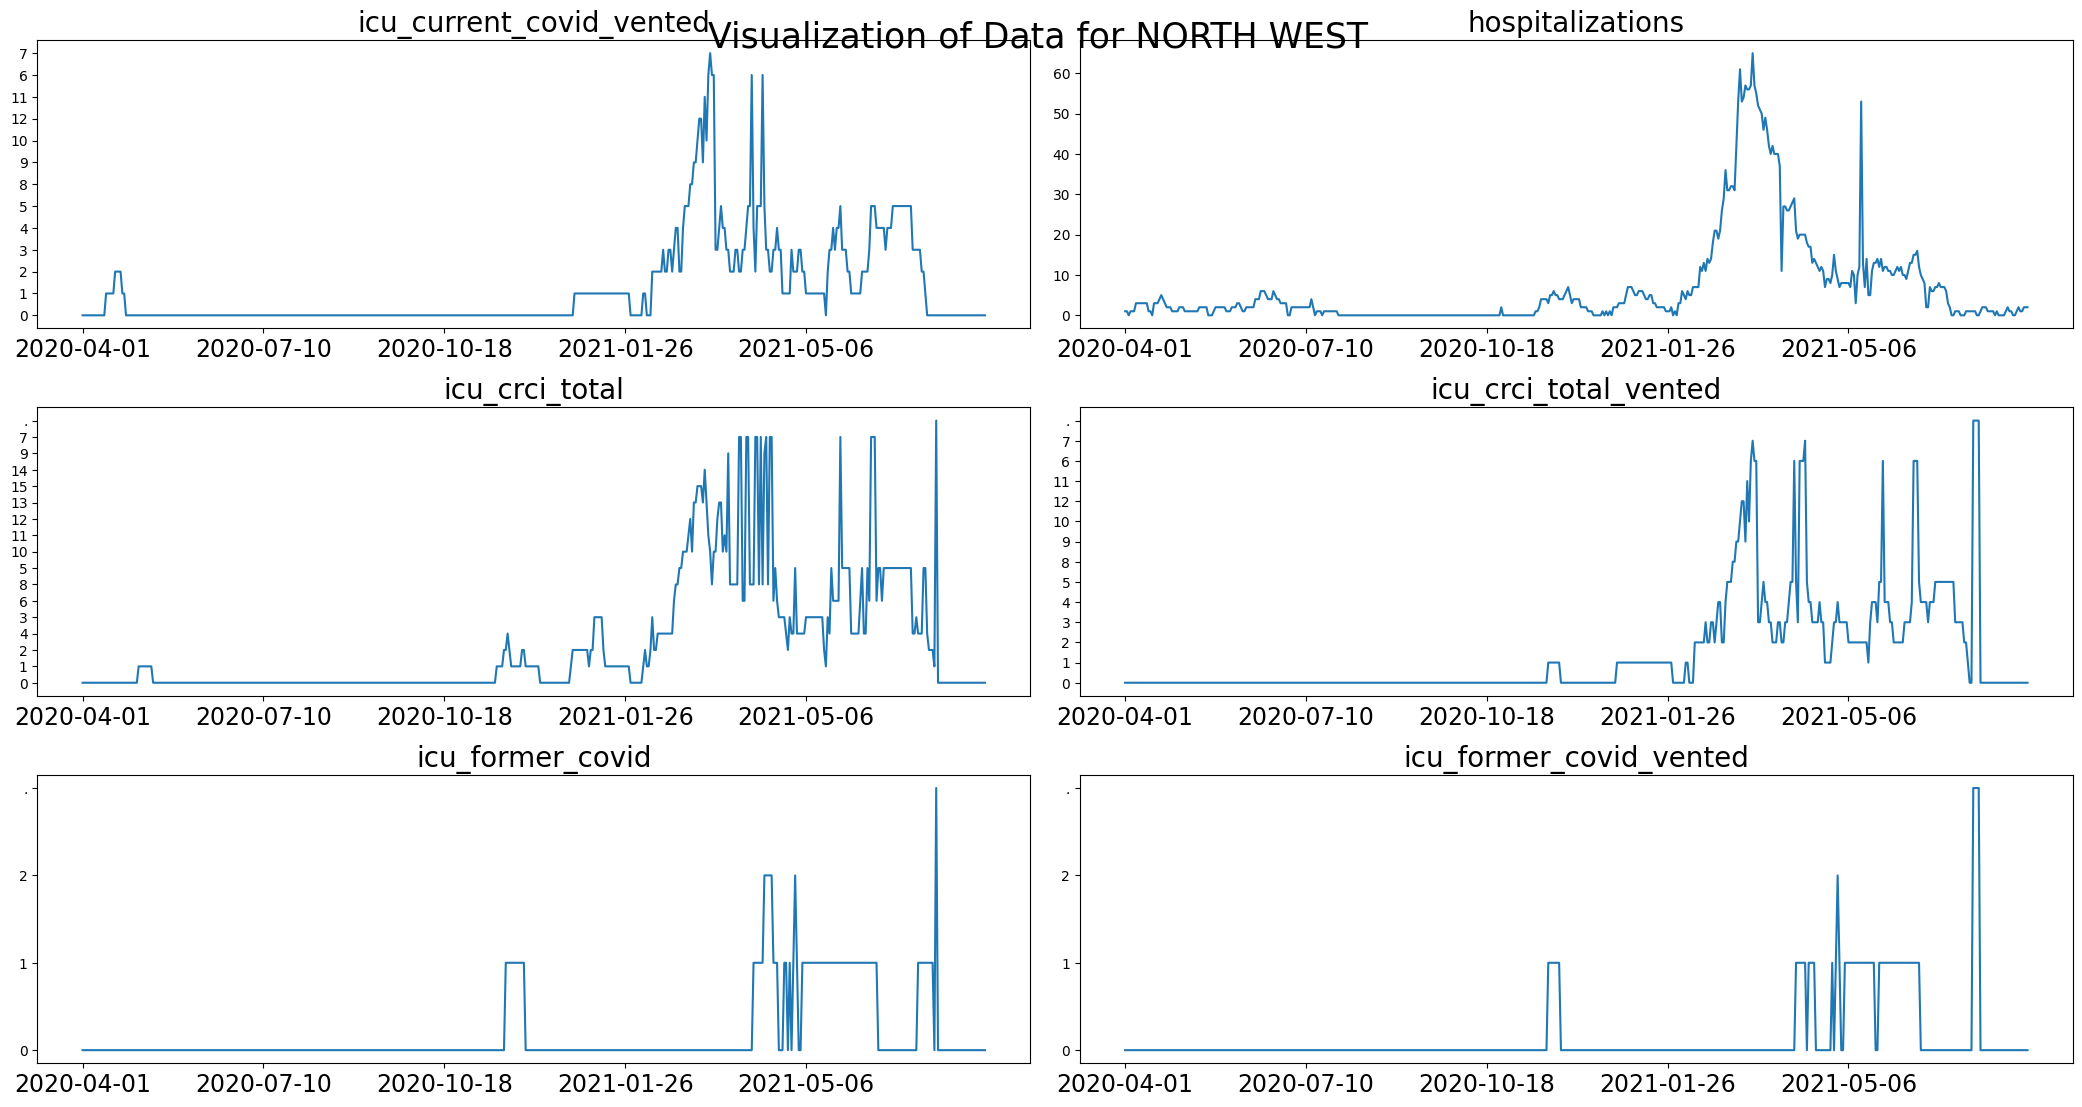

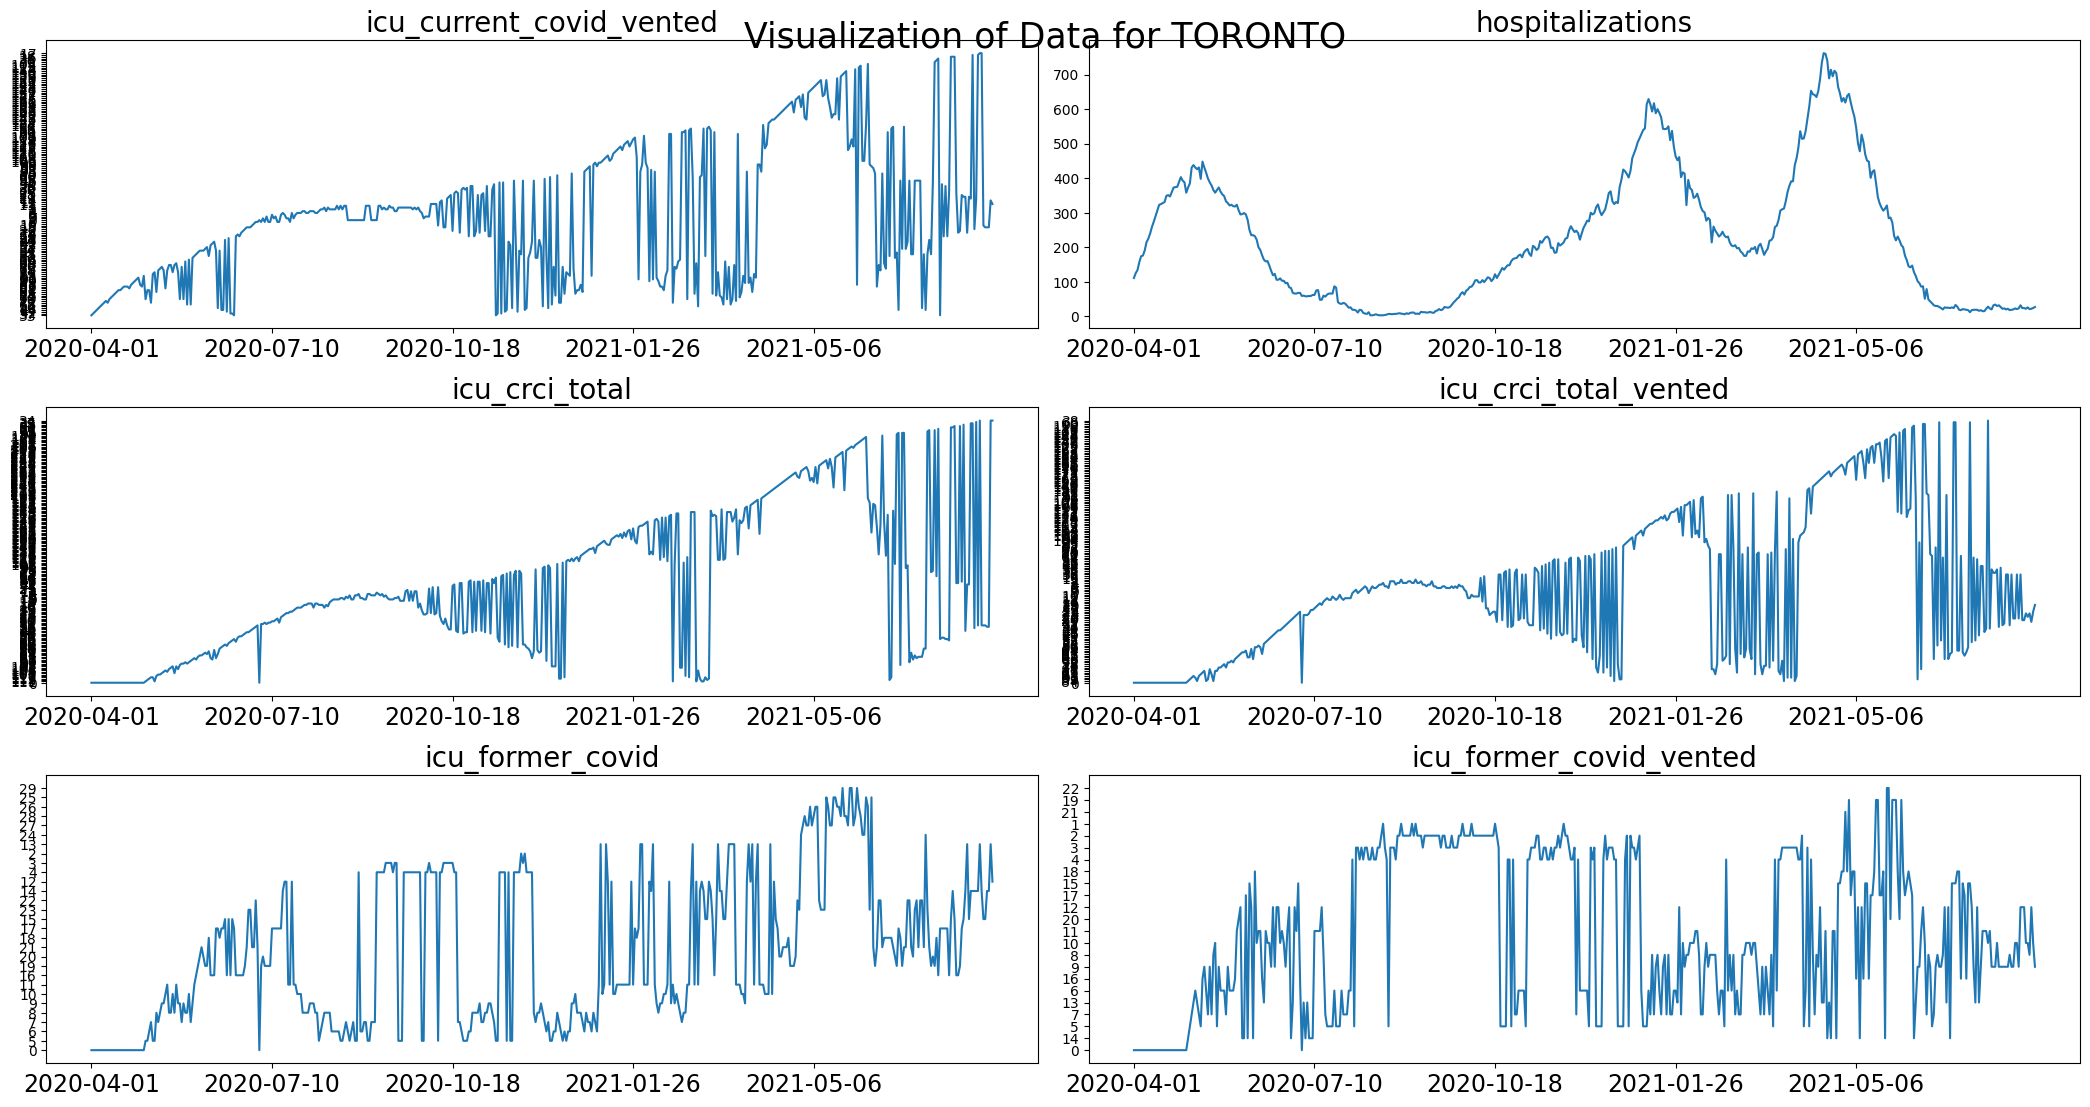

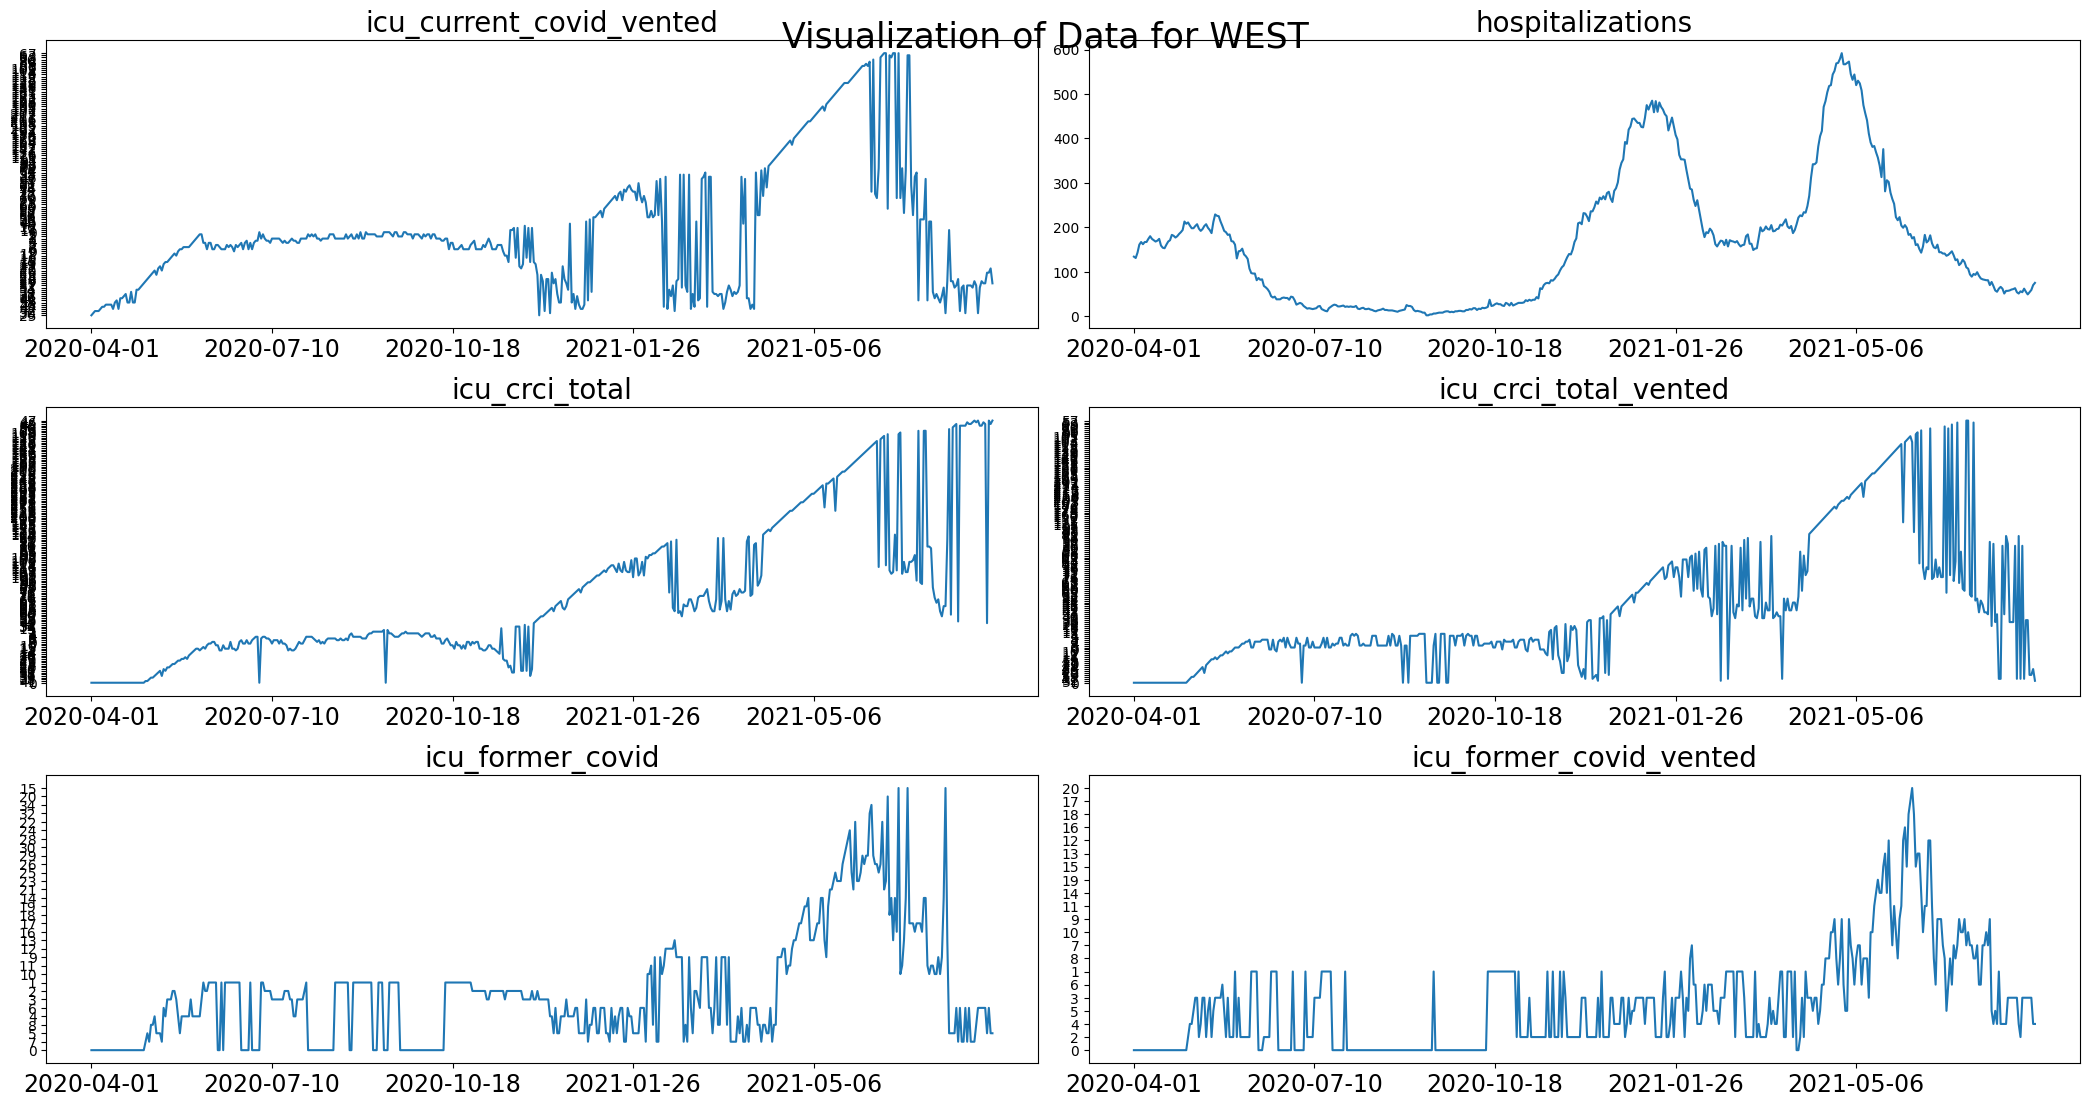

In [11]:
# region_group = data.groupby([data["oh_region"]], group_keys=True).value_counts()
# region_group = pd.DataFrame(region_group)
# region_group.head()
# region_group.tail()
for region in regions:
    location = data.loc[region]
    plt.figure(figsize=(21,15))
    i = 1
    plt.suptitle("Visualization of Data for " + region, fontsize = 25, y = 0.95)
    for name in data.columns[2:]:
        plt.subplot(4,2,i)
        plt.plot(np.arange(len(location['date'][:500])), location[name][:500])
        plt.xticks(np.arange(0,500,100), location["date"][0:500:100], fontsize = 17)
        plt.title(name, fontsize = 20)
        i +=1
    plt.tight_layout()
    plt.show()